# Homework 2

CSYE7105 Instructor: Dr. Handan Liu

<b>Name: Anshul Chaudhary</b>
    
<b>NUID: 002820096</b>

### Import statements

In [1]:
import pandas as pd
import numpy as np
import multiprocessing as mp
import time
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

### Part 1: 10 points

##### Q1. Create a Pandas DataFrame df, for the values [0,100) with a seed 1, its shape is (20,000,200).             [2 points]

In [2]:
# set seed to 1
np.random.seed(1)

# initialize the data in a 2d array
data = np.random.randint(0, 100, size=(20000, 200))

# create a dataframe from data
df = pd.DataFrame(data)

In [3]:
# display df shape
df.shape

(20000, 200)

In [4]:
# display head
df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,37,12,72,9,75,5,79,64,16,1,...,53,69,36,21,40,77,91,49,47,77
1,40,78,45,87,16,28,45,67,66,78,...,88,93,76,82,11,36,16,30,84,57
2,35,41,81,2,85,93,36,46,80,27,...,36,29,39,28,54,29,55,90,27,60
3,12,17,71,91,7,83,56,51,32,76,...,21,74,21,33,38,37,43,33,95,41
4,71,69,70,23,86,39,31,37,38,56,...,39,3,57,43,53,43,74,98,97,75


##### Q2. Normalize all columns of this df by subtracting the column mean and dividing by standard deviation. And set a timer to calculate this function. [4 points]

###### Method 1 - using df calculations

In [5]:
# initialize time
start_time = time.time()

# mean and std
means = df.mean(axis=0)
stds = df.std(axis=0) 

# subtract mean and divide standard deviation
df_n = (df - means) / stds

# calculate time taken
time_n = time.time() - start_time

In [6]:
print("Time Taken to Normalize Method 1: ", time_n)

Time Taken to Normalize Method 1:  0.06812381744384766


In [7]:
# display normailized head
df_n.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.441316,-1.296265,0.777541,-1.403266,0.866680,-1.528929,1.021315,0.502320,-1.153580,-1.679439,...,0.119883,0.663837,-0.461409,-0.989387,-0.329302,0.956994,1.434785,-0.012654,-0.086080,0.954392
1,-0.337515,0.978561,-0.156515,1.288086,-1.161000,-0.737627,-0.163384,0.606396,0.579079,1.001399,...,1.334044,1.491703,0.930337,1.126697,-1.335898,-0.464473,-1.167345,-0.668730,1.195781,0.259732
2,-0.510516,-0.296720,1.088893,-1.644798,1.210355,1.498664,-0.476981,-0.122137,1.064224,-0.774221,...,-0.469853,-0.715941,-0.357028,-0.746558,0.156640,-0.707162,0.185763,1.403090,-0.778978,0.363931
3,-1.306325,-1.123930,0.742946,1.426105,-1.470307,1.154619,0.219901,0.051323,-0.599129,0.931767,...,-0.990207,0.836309,-0.983314,-0.573108,-0.398723,-0.429803,-0.230578,-0.565139,1.576874,-0.295996
4,0.735097,0.668358,0.708352,-0.920203,1.244722,-0.359178,-0.651201,-0.434365,-0.391210,0.235445,...,-0.365782,-1.612796,0.269258,-0.226209,0.121930,-0.221784,0.844969,1.679333,1.646164,0.884926


###### Method 2 - using loops

In [8]:
# initialize time
start_time = time.time()

# initialize dict
normalized_data = {}

for column in df.columns:
    # column mean
    mean = df[column].mean() 
    # column std
    std = df[column].std()
    # normalize column
    normalized_data[column] = (df[column] - mean) / std

# Create a DataFrame from the normalized data
df_n_loop = pd.DataFrame(normalized_data)
# calculate time taken
time_n_loop = time.time() - start_time

In [9]:
print("Time Taken to Normalize Method 2: ", time_n_loop)

Time Taken to Normalize Method 2:  0.19175052642822266


In [10]:
# display normailized head
df_n_loop.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.441316,-1.296265,0.777541,-1.403266,0.866680,-1.528929,1.021315,0.502320,-1.153580,-1.679439,...,0.119883,0.663837,-0.461409,-0.989387,-0.329302,0.956994,1.434785,-0.012654,-0.086080,0.954392
1,-0.337515,0.978561,-0.156515,1.288086,-1.161000,-0.737627,-0.163384,0.606396,0.579079,1.001399,...,1.334044,1.491703,0.930337,1.126697,-1.335898,-0.464473,-1.167345,-0.668730,1.195781,0.259732
2,-0.510516,-0.296720,1.088893,-1.644798,1.210355,1.498664,-0.476981,-0.122137,1.064224,-0.774221,...,-0.469853,-0.715941,-0.357028,-0.746558,0.156640,-0.707162,0.185763,1.403090,-0.778978,0.363931
3,-1.306325,-1.123930,0.742946,1.426105,-1.470307,1.154619,0.219901,0.051323,-0.599129,0.931767,...,-0.990207,0.836309,-0.983314,-0.573108,-0.398723,-0.429803,-0.230578,-0.565139,1.576874,-0.295996
4,0.735097,0.668358,0.708352,-0.920203,1.244722,-0.359178,-0.651201,-0.434365,-0.391210,0.235445,...,-0.365782,-1.612796,0.269258,-0.226209,0.121930,-0.221784,0.844969,1.679333,1.646164,0.884926


##### Q3. Compute the correlation of each row of df with its succeeding row. And set a timer to calculate this function. [4 points]

In [11]:
# initialize time
start_time = time.time()

# calculate the correlation between each row and its succeeding row
correlations = df[:-1].apply(lambda row: row.corr(df.iloc[row.name + 1]), axis=1)

# calculate time taken
time_c = time.time() - start_time

In [12]:
print("Time Taken for correlations: ", time_c)

Time Taken for correlations:  6.052875518798828


In [13]:
# display correlations head
correlations.head()

0   -0.135114
1   -0.066559
2    0.126696
3   -0.054183
4   -0.038604
dtype: float64

### Part 2: 45 points

##### Q1. Define a function “part2” to do the same thing of Part1-Q2.  [4 points]

In [14]:
def part2(column_data):
    # Calculate the mean
    mean = column_data.mean()  
    # Calculate the standard deviation
    std = column_data.std()         
    return (column_data - mean) / std

##### Q2. Parallelize this function “part2”:                       [12 points]

###### Q2.1 Use multiprocessing.Pool method (map or starmap) to parallelize the function “part2”.            [2pt]

In [15]:
def parallel_normalize(df_input, num_cpus):
    with mp.Pool(num_cpus) as pool:
        # use pool.map to apply part2 to each column
        normalized_chunks = pool.map(part2, [df_input[column] for column in df_input.columns])
        # transpose the result to create a DataFrame with the same shape as df
        res = pd.DataFrame(normalized_chunks).T
    return res

###### Q2.2 Set a timer to calculate the wall-clock time for the parallelized code when the number of CPUs is 2, 4, 6, and 8, respectively.                  [4pt]

In [16]:
cpu_counts = [2, 4, 6, 8]
timings = []
for cpus in cpu_counts:
    start_time = time.time()
    df_normalized = parallel_normalize(df, cpus)
    elapsed_time = time.time() - start_time
    timings.append(elapsed_time)
    print(f"Time taken with {cpus} CPUs: {elapsed_time:.4f} seconds")

Time taken with 2 CPUs: 0.5761 seconds
Time taken with 4 CPUs: 0.4056 seconds
Time taken with 6 CPUs: 0.4729 seconds
Time taken with 8 CPUs: 0.3921 seconds


In [17]:
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.441316,-1.296265,0.777541,-1.403266,0.866680,-1.528929,1.021315,0.502320,-1.153580,-1.679439,...,0.119883,0.663837,-0.461409,-0.989387,-0.329302,0.956994,1.434785,-0.012654,-0.086080,0.954392
1,-0.337515,0.978561,-0.156515,1.288086,-1.161000,-0.737627,-0.163384,0.606396,0.579079,1.001399,...,1.334044,1.491703,0.930337,1.126697,-1.335898,-0.464473,-1.167345,-0.668730,1.195781,0.259732
2,-0.510516,-0.296720,1.088893,-1.644798,1.210355,1.498664,-0.476981,-0.122137,1.064224,-0.774221,...,-0.469853,-0.715941,-0.357028,-0.746558,0.156640,-0.707162,0.185763,1.403090,-0.778978,0.363931
3,-1.306325,-1.123930,0.742946,1.426105,-1.470307,1.154619,0.219901,0.051323,-0.599129,0.931767,...,-0.990207,0.836309,-0.983314,-0.573108,-0.398723,-0.429803,-0.230578,-0.565139,1.576874,-0.295996
4,0.735097,0.668358,0.708352,-0.920203,1.244722,-0.359178,-0.651201,-0.434365,-0.391210,0.235445,...,-0.365782,-1.612796,0.269258,-0.226209,0.121930,-0.221784,0.844969,1.679333,1.646164,0.884926


###### Q2.3 Use matplotlib (or other Python tools) to plot the 3 graphs: wall-clock time, speedup and efficiency respectively as the number of CPUs increases.       [3pt]

In [18]:
# Calculate speedup and efficiency
speedup = [time_n_loop / t for t in timings]
efficiency = [s / cpus for s, cpus in zip(speedup, cpu_counts)]

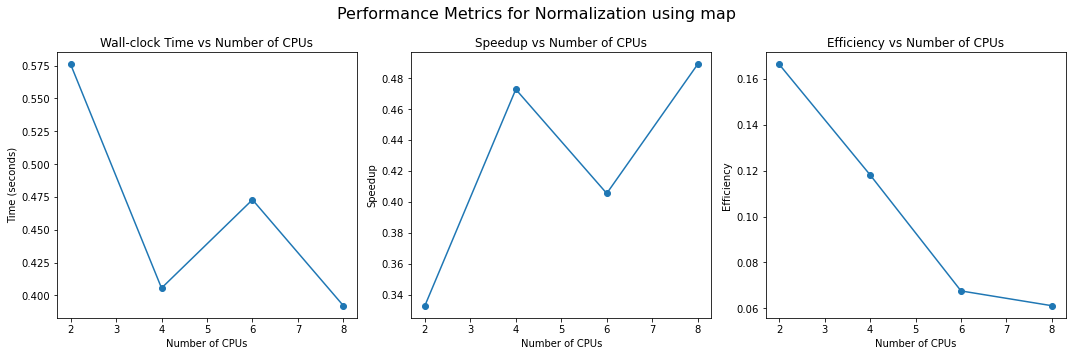

In [19]:
# Plotting
plt.figure(figsize=(15, 5))

# Wall-clock time plot
plt.subplot(1, 3, 1)
plt.plot(cpu_counts, timings, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(1, 3, 2)
plt.plot(cpu_counts, speedup, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(1, 3, 3)
plt.plot(cpu_counts, efficiency, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')


plt.suptitle('Performance Metrics for Normalization using map', fontsize=16)
plt.tight_layout()
plt.show()


###### Q2.4 Save these 3 graphs as 3 image files.        [3pt]

In [20]:
# Wall-clock time plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, timings, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('normalization_wall_clock_time_with_map.png')
plt.close()

# Speedup plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, speedup, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')
plt.savefig('normalization_speedup_with_map.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, efficiency, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('normalization_efficiency_with_map.png')
plt.close()

##### Q3. Use multiprocessing.Pool imap to set 2 different chunk size to parallelize the function “part2” [2pt] and do the same things as for Q2.2[4pt], Q2.3[3pt] and Q2.4[3pt].         [12 points]

In [21]:
def parallel_normalization_imap(df_input, num_cpus, chunk_size):
    pool = mp.Pool(num_cpus)
    normalized_columns = pool.imap(part2, [df_input[column] for column in df_input.columns], chunksize=chunk_size)
    pool.close()
    pool.join()
    return pd.DataFrame(normalized_columns).T

In [22]:
chunk_sizes = [10, 50]
cpus = 2
timings_imap = {}
for chunk in chunk_sizes:
    start_time = time.time()
    df_normalized = parallel_normalization_imap(df, cpus, chunk)
    elapsed_time = time.time() - start_time
    timings_imap[chunk] = elapsed_time
    print(f"Time taken with chunk size {chunk}: {elapsed_time:.4f} seconds")

Time taken with chunk size 10: 0.5125 seconds
Time taken with chunk size 50: 0.4411 seconds


In [23]:
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.441316,-1.296265,0.777541,-1.403266,0.866680,-1.528929,1.021315,0.502320,-1.153580,-1.679439,...,0.119883,0.663837,-0.461409,-0.989387,-0.329302,0.956994,1.434785,-0.012654,-0.086080,0.954392
1,-0.337515,0.978561,-0.156515,1.288086,-1.161000,-0.737627,-0.163384,0.606396,0.579079,1.001399,...,1.334044,1.491703,0.930337,1.126697,-1.335898,-0.464473,-1.167345,-0.668730,1.195781,0.259732
2,-0.510516,-0.296720,1.088893,-1.644798,1.210355,1.498664,-0.476981,-0.122137,1.064224,-0.774221,...,-0.469853,-0.715941,-0.357028,-0.746558,0.156640,-0.707162,0.185763,1.403090,-0.778978,0.363931
3,-1.306325,-1.123930,0.742946,1.426105,-1.470307,1.154619,0.219901,0.051323,-0.599129,0.931767,...,-0.990207,0.836309,-0.983314,-0.573108,-0.398723,-0.429803,-0.230578,-0.565139,1.576874,-0.295996
4,0.735097,0.668358,0.708352,-0.920203,1.244722,-0.359178,-0.651201,-0.434365,-0.391210,0.235445,...,-0.365782,-1.612796,0.269258,-0.226209,0.121930,-0.221784,0.844969,1.679333,1.646164,0.884926


###### Q3.2 - same as (Set a timer to calculate the wall-clock time for the parallelized code when the number of CPUs is 2, 4, 6, and 8, respectively.)

In [24]:
from collections import defaultdict

chunk_sizes = [10, 50]
cpu_counts = [2, 4, 6, 8]
timings_imap = defaultdict(list)
for chunk in chunk_sizes:
    for cpus in cpu_counts:
        start_time = time.time()
        df_normalized = parallel_normalization_imap(df, cpus, chunk)
        elapsed_time = time.time() - start_time
        timings_imap[chunk].append(elapsed_time)
        print(f"Time taken with {cpus} CPU & chunk size {chunk}: {elapsed_time:.4f} seconds")

Time taken with 2 CPU & chunk size 10: 0.4746 seconds
Time taken with 4 CPU & chunk size 10: 0.3817 seconds
Time taken with 6 CPU & chunk size 10: 0.4274 seconds
Time taken with 8 CPU & chunk size 10: 0.4193 seconds
Time taken with 2 CPU & chunk size 50: 0.4239 seconds
Time taken with 4 CPU & chunk size 50: 0.4773 seconds
Time taken with 6 CPU & chunk size 50: 0.7124 seconds
Time taken with 8 CPU & chunk size 50: 0.4869 seconds


In [25]:
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.441316,-1.296265,0.777541,-1.403266,0.866680,-1.528929,1.021315,0.502320,-1.153580,-1.679439,...,0.119883,0.663837,-0.461409,-0.989387,-0.329302,0.956994,1.434785,-0.012654,-0.086080,0.954392
1,-0.337515,0.978561,-0.156515,1.288086,-1.161000,-0.737627,-0.163384,0.606396,0.579079,1.001399,...,1.334044,1.491703,0.930337,1.126697,-1.335898,-0.464473,-1.167345,-0.668730,1.195781,0.259732
2,-0.510516,-0.296720,1.088893,-1.644798,1.210355,1.498664,-0.476981,-0.122137,1.064224,-0.774221,...,-0.469853,-0.715941,-0.357028,-0.746558,0.156640,-0.707162,0.185763,1.403090,-0.778978,0.363931
3,-1.306325,-1.123930,0.742946,1.426105,-1.470307,1.154619,0.219901,0.051323,-0.599129,0.931767,...,-0.990207,0.836309,-0.983314,-0.573108,-0.398723,-0.429803,-0.230578,-0.565139,1.576874,-0.295996
4,0.735097,0.668358,0.708352,-0.920203,1.244722,-0.359178,-0.651201,-0.434365,-0.391210,0.235445,...,-0.365782,-1.612796,0.269258,-0.226209,0.121930,-0.221784,0.844969,1.679333,1.646164,0.884926


###### Q3.3 - same as (Use matplotlib (or other Python tools) to plot the 3 graphs: wall-clock time, speedup and efficiency respectively as the number of CPUs increases.)

In [26]:
# Calculate speedup and efficiency chunk size 10
speedup_chunk_10 = [time_n_loop / t for t in timings_imap[chunk_sizes[0]]]
efficiency_chunk_10 = [s / cpus for s, cpus in zip(speedup_chunk_10, cpu_counts)]

In [27]:
# Calculate speedup and efficiency chunk size 50
speedup_chunk_50 = [time_n_loop / t for t in timings_imap[chunk_sizes[1]]]
efficiency_chunk_50 = [s / cpus for s, cpus in zip(speedup_chunk_50, cpu_counts)]

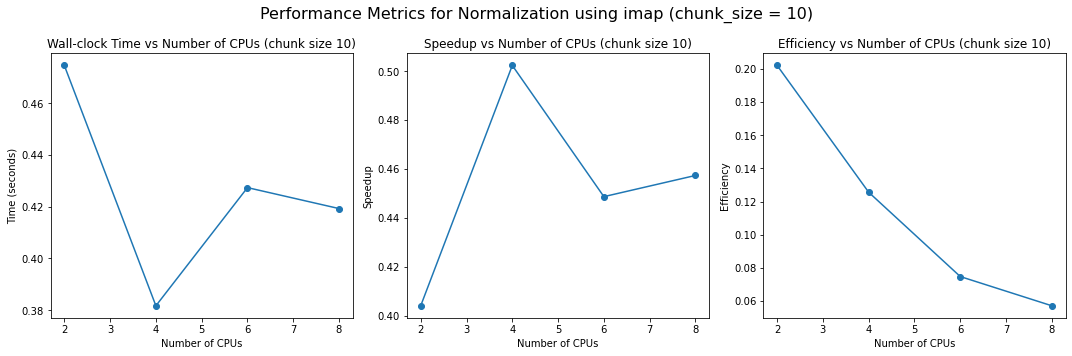

In [28]:
# plot for chunk size 10
# Plotting
plt.figure(figsize=(15, 5))

# Wall-clock time plot
plt.subplot(1, 3, 1)
plt.plot(cpu_counts, timings_imap[chunk_sizes[0]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(1, 3, 2)
plt.plot(cpu_counts, speedup_chunk_10, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(1, 3, 3)
plt.plot(cpu_counts, efficiency_chunk_10, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.suptitle('Performance Metrics for Normalization using imap (chunk_size = 10)', fontsize=16)
plt.tight_layout()
plt.show()

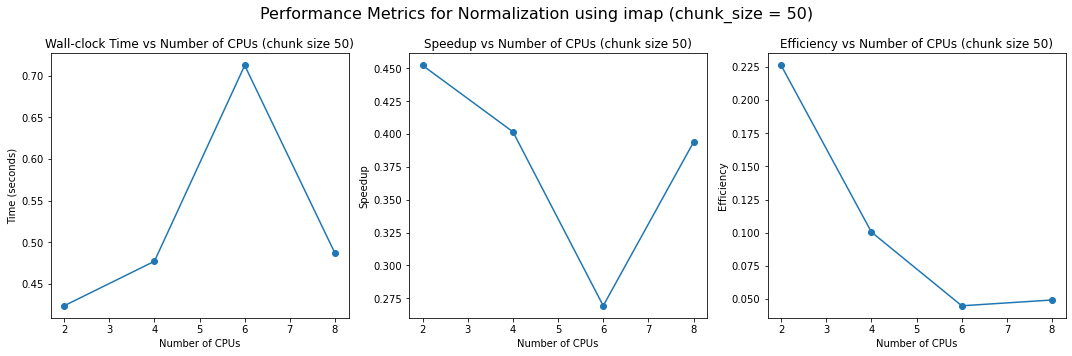

In [29]:
# plot for chunk size 50
# Plotting
plt.figure(figsize=(15, 5))

# Wall-clock time plot
plt.subplot(1, 3, 1)
plt.plot(cpu_counts, timings_imap[chunk_sizes[1]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(1, 3, 2)
plt.plot(cpu_counts, speedup_chunk_50, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(1, 3, 3)
plt.plot(cpu_counts, efficiency_chunk_50, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.suptitle('Performance Metrics for Normalization using imap (chunk_size = 50)', fontsize=16)
plt.tight_layout()
plt.show()

###### Q3.4 same as - (Save these 3 graphs as 3 image files.        [3pt])

In [30]:
# for chunk size of 10

# Wall-clock time plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, timings_imap[chunk_sizes[0]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('normalization_wall_clock_time_with_imap_chunk_10.png')
plt.close()

# Speedup plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, speedup_chunk_10, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')
plt.savefig('normalization_speedup_with_imap_chunk_10.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, efficiency_chunk_10, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('normalization_efficiency_imap_chunk_10.png')
plt.close()

In [31]:
# for chunk size of 50

# Wall-clock time plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, timings_imap[chunk_sizes[1]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('normalization_wall_clock_time_with_imap_chunk_50.png')
plt.close()

# Speedup plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, speedup_chunk_50, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')
plt.savefig('normalization_speedup_with_imap_chunk_50.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, efficiency_chunk_50, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('normalization_efficiency_imap_chunk_50.png')
plt.close()

##### Q4. Select the better performance of the chunk-size in Q3, compare the performance (time, speedup and efficiency) with Q2 (combining together), and do the same things (plots and image files) as for Q2.3 and Q2.4.                [6 points]

Chunk size of 10 is better performing, as we can see from the 2 figures above. 
- From the wall clock time in chunks 10 and 50 we can observe that the time increases as the cores increase in chunk size 50, whereas for size 10 there was a sudden decrease and then a slight increase with an increase in cores.
-	The performance of 10 chunk size is better than that of 50 as we can see from speed up as well, the speedup decreases in chunk size 50 whereas there is an increase in speedup in chunk size 10.
-	As the number of CPUs increases, efficiency drops significantly in both cases.
-	The dip in speedup after 4 CPUs could indicate that task management overhead became substantial at that point in both cases.


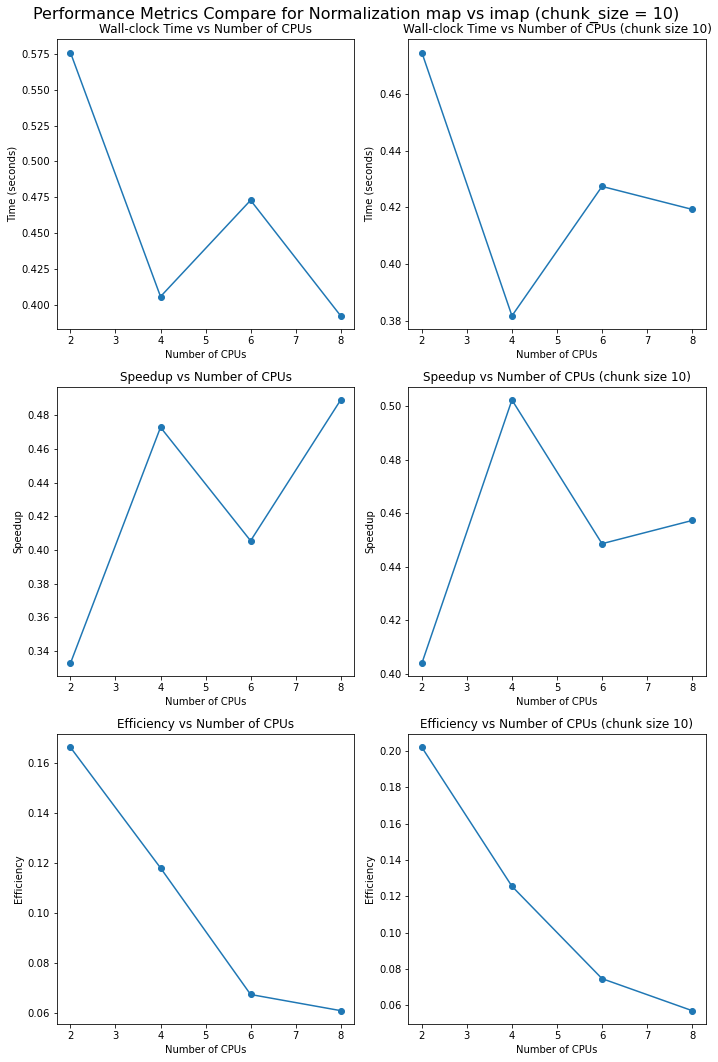

In [32]:
plt.figure(figsize=(10, 15))

# Wall-clock time plot
plt.subplot(3, 2, 1)
plt.plot(cpu_counts, timings, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

plt.subplot(3, 2, 2)
plt.plot(cpu_counts, timings_imap[chunk_sizes[0]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(3, 2, 3)
plt.plot(cpu_counts, speedup, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

plt.subplot(3, 2, 4)
plt.plot(cpu_counts, speedup_chunk_10, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(3, 2, 5)
plt.plot(cpu_counts, efficiency, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.subplot(3, 2, 6)
plt.plot(cpu_counts, efficiency_chunk_10, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.suptitle('Performance Metrics Compare for Normalization map vs imap (chunk_size = 10)', fontsize=16)
plt.tight_layout()
plt.show()

In [33]:
# Wall-clock time plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cpu_counts, timings, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

plt.subplot(1, 2, 2)
plt.plot(cpu_counts, timings_imap[chunk_sizes[0]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('normalization_wall_clock_compare.png')
plt.close()

# Speedup plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cpu_counts, speedup, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

plt.subplot(1, 2, 2)
plt.plot(cpu_counts, speedup_chunk_10, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

plt.savefig('normalization_speedup_compare.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cpu_counts, efficiency, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.subplot(1, 2, 2)
plt.plot(cpu_counts, efficiency_chunk_10, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('normalization_efficiency_compare.png')
plt.close()

### Part 3: 45 points

##### Q1. Define a function “part3” to do the same thing of Part1-Q3.  [4 points]

In [34]:
def part3(row):
    row1, row2 = row
    return row1.corr(row2)

##### Q2. Parallelize this function “part3”:                       [12 points]

###### Q2.1 Use multiprocessing.Pool method (map or starmap) to parallelize the function “part2”.            [2pt]

In [35]:
def parallel_correlation(df_input, num_cpus):
    with mp.Pool(num_cpus) as pool:
        correlations = pool.map(part3, [(df_input.iloc[i], df_input.iloc[i+1]) for i in range(len(df_input) - 1)])
    return correlations

###### Q2.2 Set a timer to calculate the wall-clock time for the parallelized code when the number of CPUs is 2, 4, 6, and 8, respectively.                  [4pt]

In [36]:
cpu_counts = [2, 4, 6, 8]
timings_corr = []

for cpus in cpu_counts:
    start_time = time.time()
    df_correlation = parallel_correlation(df, cpus)
    elapsed_time = time.time() - start_time
    timings_corr.append(elapsed_time)
    print(f"Time taken with {cpus} CPUs: {elapsed_time:.4f} seconds")

Time taken with 2 CPUs: 7.3981 seconds
Time taken with 4 CPUs: 5.7648 seconds
Time taken with 6 CPUs: 5.2899 seconds
Time taken with 8 CPUs: 5.0853 seconds


In [37]:
df_correlation[:5]

[-0.13511437705994997,
 -0.0665590280448841,
 0.12669605947412618,
 -0.05418316975394573,
 -0.03860435918740946]

###### Q2.3 Use matplotlib (or other Python tools) to plot the 3 graphs: wall-clock time, speedup and efficiency respectively as the number of CPUs increases.       [3pt]

In [38]:
# Calculate speedup and efficiency
speedup_corr = [time_c / t for t in timings_corr]
efficiency_corr = [s / cpus for s, cpus in zip(speedup_corr, cpu_counts)]

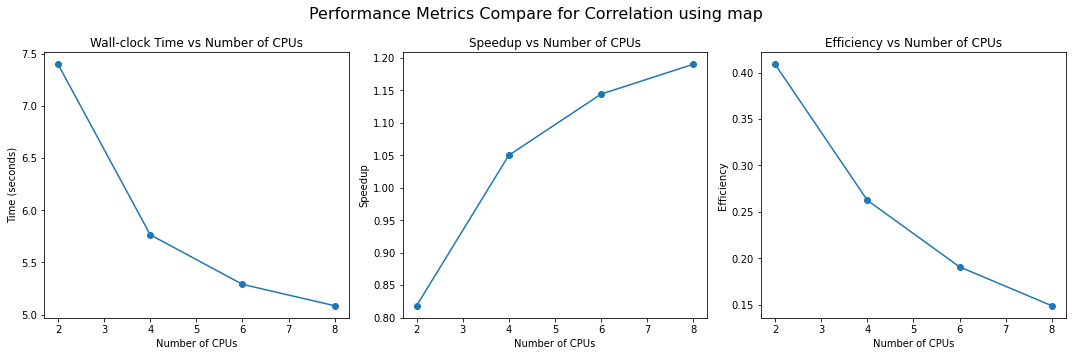

In [39]:
# Plotting
plt.figure(figsize=(15, 5))

# Wall-clock time plot
plt.subplot(1, 3, 1)
plt.plot(cpu_counts, timings_corr, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(1, 3, 2)
plt.plot(cpu_counts, speedup_corr, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(1, 3, 3)
plt.plot(cpu_counts, efficiency_corr, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')


plt.suptitle('Performance Metrics Compare for Correlation using map', fontsize=16)
plt.tight_layout()
plt.show()


###### Q2.4 Save these 3 graphs as 3 image files.        [3pt]

In [40]:
# Wall-clock time plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, timings_corr, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('correlation_wall_clock_time_with_map.png')
plt.close()

# Speedup plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, speedup_corr, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')
plt.savefig('correlation_speedup_with_map.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, efficiency_corr, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('correlation_efficiency_with_map.png')
plt.close()


##### Q3. Use multiprocessing.Pool imap to set 2 different chunk size to parallelize the function “part2” [2pt] and do the same things as for Q2.2[4pt], Q2.3[3pt] and Q2.4[3pt].         [12 points]

In [41]:
def parallel_correlation_imap(df_input, num_cpus, chunk_size):
    pool = mp.Pool(num_cpus)
    correlations = pool.imap(part3, [(df_input.iloc[i], df_input.iloc[i+1]) for i in range(len(df_input) - 1)], chunksize=chunk_size)
    correlations = list(correlations)
    pool.close()
    pool.join()
    return correlations

In [42]:
chunk_sizes = [10, 50]
cpus = 2
timings_imap_corr = {}
for chunk in chunk_sizes:
    start_time = time.time()
    df_correlation = parallel_correlation_imap(df, cpus, chunk)
    elapsed_time = time.time() - start_time
    timings_imap_corr[chunk] = elapsed_time
    print(f"Time taken with chunk size {chunk}: {elapsed_time:.4f} seconds")

Time taken with chunk size 10: 6.6960 seconds
Time taken with chunk size 50: 6.1272 seconds


In [43]:
df_correlation[:5]

[-0.13511437705994997,
 -0.0665590280448841,
 0.12669605947412618,
 -0.05418316975394573,
 -0.03860435918740946]

###### Q3.2 - same as (Set a timer to calculate the wall-clock time for the parallelized code when the number of CPUs is 2, 4, 6, and 8, respectively.)

In [44]:
from collections import defaultdict

chunk_sizes = [10, 50]
cpu_counts = [2, 4, 6, 8]
timings_imap_corr = defaultdict(list)
for chunk in chunk_sizes:
    for cpus in cpu_counts:
        start_time = time.time()
        df_correlation = parallel_correlation_imap(df, cpus, chunk)
        elapsed_time = time.time() - start_time
        timings_imap_corr[chunk].append(elapsed_time)
        print(f"Time taken with {cpus} CPU & chunk size {chunk}: {elapsed_time:.4f} seconds")

Time taken with 2 CPU & chunk size 10: 6.5398 seconds
Time taken with 4 CPU & chunk size 10: 4.7461 seconds
Time taken with 6 CPU & chunk size 10: 4.6100 seconds
Time taken with 8 CPU & chunk size 10: 4.6020 seconds
Time taken with 2 CPU & chunk size 50: 6.1929 seconds
Time taken with 4 CPU & chunk size 50: 4.8498 seconds
Time taken with 6 CPU & chunk size 50: 4.3973 seconds
Time taken with 8 CPU & chunk size 50: 4.5176 seconds


In [45]:
df_correlation[:5]

[-0.13511437705994997,
 -0.0665590280448841,
 0.12669605947412618,
 -0.05418316975394573,
 -0.03860435918740946]

###### Q3.3 - same as (Use matplotlib (or other Python tools) to plot the 3 graphs: wall-clock time, speedup and efficiency respectively as the number of CPUs increases.)

In [46]:
# Calculate speedup and efficiency chunk size 10
speedup_corr_chunk_10 = [time_c / t for t in timings_imap_corr[chunk_sizes[0]]]
efficiency_corr_chunk_10 = [s / cpus for s, cpus in zip(speedup_corr_chunk_10, cpu_counts)]

In [47]:
# Calculate speedup and efficiency chunk size 50
speedup_corr_chunk_50 = [time_c / t for t in timings_imap_corr[chunk_sizes[1]]]
efficiency_corr_chunk_50 = [s / cpus for s, cpus in zip(speedup_corr_chunk_50, cpu_counts)]

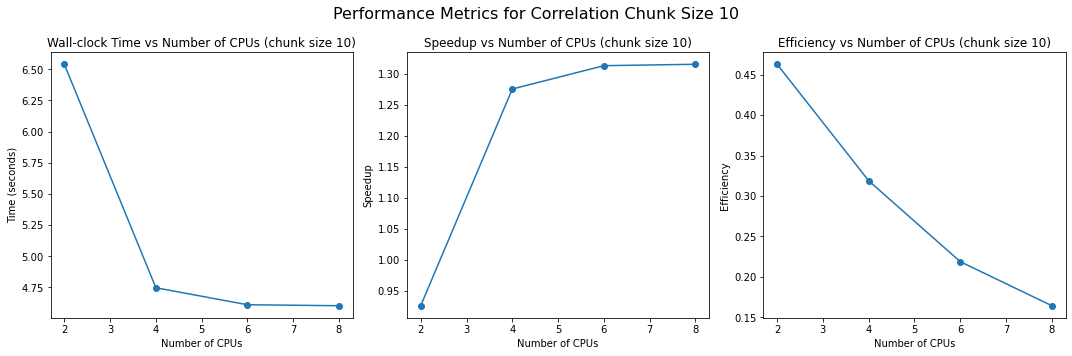

In [48]:
# plot for chunk size 10
# Plotting
plt.figure(figsize=(15, 5))

# Wall-clock time plot
plt.subplot(1, 3, 1)
plt.plot(cpu_counts, timings_imap_corr[chunk_sizes[0]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(1, 3, 2)
plt.plot(cpu_counts, speedup_corr_chunk_10, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(1, 3, 3)
plt.plot(cpu_counts, efficiency_corr_chunk_10, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')


plt.suptitle('Performance Metrics for Correlation Chunk Size 10', fontsize=16)
plt.tight_layout()
plt.show()

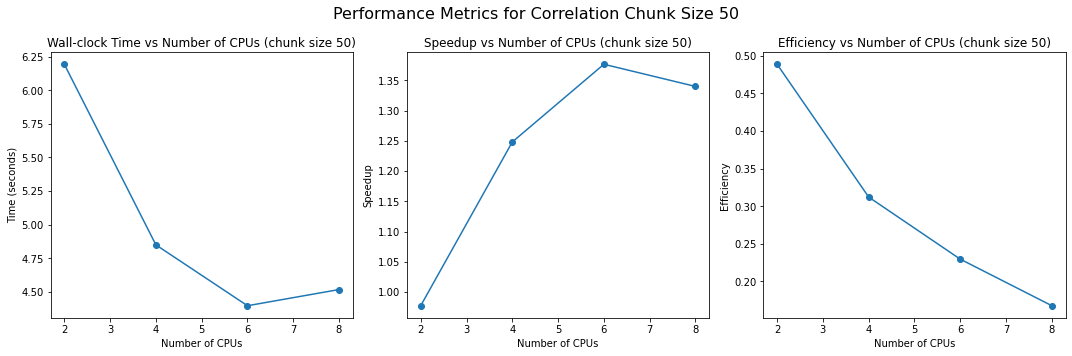

In [49]:
# plot for chunk size 50
# Plotting
plt.figure(figsize=(15, 5))

# Wall-clock time plot
plt.subplot(1, 3, 1)
plt.plot(cpu_counts, timings_imap_corr[chunk_sizes[1]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(1, 3, 2)
plt.plot(cpu_counts, speedup_corr_chunk_50, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(1, 3, 3)
plt.plot(cpu_counts, efficiency_corr_chunk_50, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')


plt.suptitle('Performance Metrics for Correlation Chunk Size 50', fontsize=16)
plt.tight_layout()
plt.show()

###### Q3.4 same as - (Save these 3 graphs as 3 image files.        [3pt])

In [50]:
# for chunk size of 10

# Wall-clock time plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, timings_imap_corr[chunk_sizes[0]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('correlation_wall_clock_time_with_imap_chunk_10.png')
plt.close()

# Speedup plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, speedup_corr_chunk_10, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')
plt.savefig('correlation_speedup_with_imap_chunk_10.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, efficiency_corr_chunk_10, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 10)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('correlation_efficiency_imap_chunk_10.png')
plt.close()

In [51]:
# for chunk size of 50

# Wall-clock time plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, timings_imap_corr[chunk_sizes[1]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('correlation_wall_clock_time_with_imap_chunk_50.png')
plt.close()

# Speedup plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, speedup_corr_chunk_50, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')
plt.savefig('correlation_speedup_with_imap_chunk_50.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(5, 5))
plt.plot(cpu_counts, efficiency_corr_chunk_50, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('correlation_efficiency_imap_chunk_50.png')
plt.close()

##### Q4. Select the better performance of the chunk-size in Q3, compare the performance (time, speedup and efficiency) with Q2 (combining together), and do the same things (plots and image files) as for Q2.3 and Q2.4.                [6 points]

Chunk size of 50 is better performing, as we can see from the two figures above. 
-	From the wall clock time in chunks 10 and 50 we can observe that the time decreases as the cores increase, in chunk size 50 we can observe that the wall clock time is less.
-	The performance of 50 chunk size is better than that of 10 as we can see from speed up as well, the speedup is low in chunk size 10 whereas there is an increase in speedup at chunk size 50.
-	As the number of CPUs increases, efficiency drops significantly in both cases.
-	The dip in speedup after 6 CPUs could indicate that task management overhead became substantial at that point in both cases.


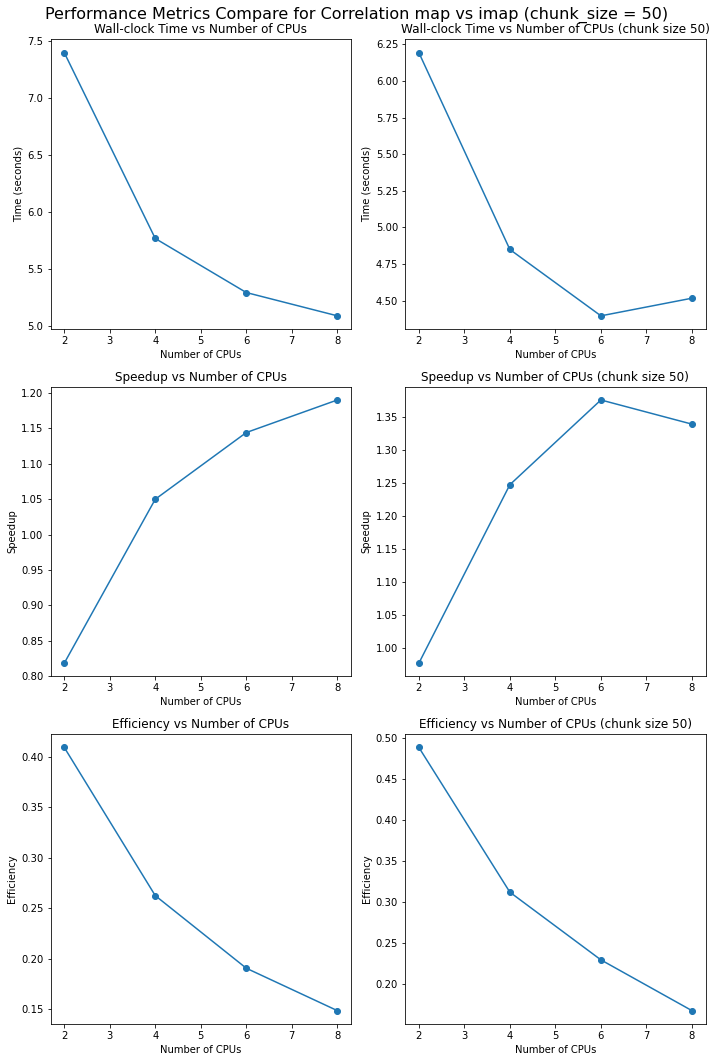

In [52]:
plt.figure(figsize=(10, 15))

# Wall-clock time plot
plt.subplot(3, 2, 1)
plt.plot(cpu_counts, timings_corr, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

plt.subplot(3, 2, 2)
plt.plot(cpu_counts, timings_imap_corr[chunk_sizes[1]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

# Speedup plot
plt.subplot(3, 2, 3)
plt.plot(cpu_counts, speedup_corr, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

plt.subplot(3, 2, 4)
plt.plot(cpu_counts, speedup_corr_chunk_50, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

# Efficiency plot
plt.subplot(3, 2, 5)
plt.plot(cpu_counts, efficiency_corr, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.subplot(3, 2, 6)
plt.plot(cpu_counts, efficiency_corr_chunk_50, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.suptitle('Performance Metrics Compare for Correlation map vs imap (chunk_size = 50)', fontsize=16)
plt.tight_layout()
plt.show()

In [53]:
# Wall-clock time plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cpu_counts, timings_corr, marker='o')
plt.title('Wall-clock Time vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')

plt.subplot(1, 2, 2)
plt.plot(cpu_counts, timings_imap_corr[chunk_sizes[1]], marker='o')
plt.title('Wall-clock Time vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.savefig('correlation_wall_clock_compare.png')
plt.close()

# Speedup plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cpu_counts, speedup_corr, marker='o')
plt.title('Speedup vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

plt.subplot(1, 2, 2)
plt.plot(cpu_counts, speedup_corr_chunk_50, marker='o')
plt.title('Speedup vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Speedup')

plt.savefig('correlation_speedup_compare.png')
plt.close()

# Efficiency plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cpu_counts, efficiency_corr, marker='o')
plt.title('Efficiency vs Number of CPUs')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')

plt.subplot(1, 2, 2)
plt.plot(cpu_counts, efficiency_corr_chunk_50, marker='o')
plt.title('Efficiency vs Number of CPUs (chunk size 50)')
plt.xlabel('Number of CPUs')
plt.ylabel('Efficiency')
plt.savefig('correlation_efficiency_compare.png')
plt.close()